In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso,ElasticNet
import sklearn.model_selection
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import confusion_matrix, mean_squared_error
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.metrics import mean_squared_error
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score, train_test_split,learning_curve,cross_val_predict
from sklearn import linear_model
from sklearn import metrics
import seaborn as sns
import os
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
import sklearn.metrics as met
import math

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
%%javascript
//IPython.OutputArea.auto_scroll_threshold = 99999;   //设置输出>9999时才出现滑动窗口
IPython.OutputArea.prototype._should_scroll = function(){return false}  // 设置不出现滑动窗口 true, auto, false 

<IPython.core.display.Javascript object>

In [ ]:
df_exp=pd.read_csv('gdsc_exp.csv',encoding="ISO-8859-1")
print( ' sample of dataset : ', df_exp.shape[0], ', num of genes  : ', df_exp.shape[1] )
df_dr=pd.read_csv('gdsc_drug.csv')
#df_dr=pd.read_csv('gdsc_auc.csv')
genename=df_exp.iloc[:,0]
df_exp=df_exp.iloc[:,1:]
df_exp.index=genename

 sample of dataset :  17737 , num of genes  :  1019


In [ ]:
lst_drug=['17-AAG','AZD-0530','AZD6244','Erlotinib','Lapatinib','Nilotinib','Nutlin-3a',
          'PD-0325901','PD-0332991','PHA-665752','PLX4720','Sorafenib']

In [ ]:
cor_list=[]
df_final=pd.DataFrame()
cor_final=pd.DataFrame()
response_data=pd.DataFrame()
response_df=pd.DataFrame()
#for auc
#lst_alpha=[0.003]
#for ic50
lst_alpha=[0.03]

this is prediction for  17-AAG

------------------------------------------

 nan sample num is :  182

 sample of dataset :  836 , num of genes  :  17737

------------------------------------------

 gene num after PCC (per-selection):  10428

This is 2nd selection using EN....alpha= 0.03

ElasticNet picked 566 variables and eliminated the other 9862 variables

Find best parma for prediction by Grid search

Best Scroe(Normalized.MSE): -0.1966 with parameters {'alpha': 0.3, 'l1_ratio': 0}
Normalized.MSE (CV) = -0.1966

Pearson Correlation Coefficient :  0.811308629001321 pvalue :  1.2683125720927307e-196


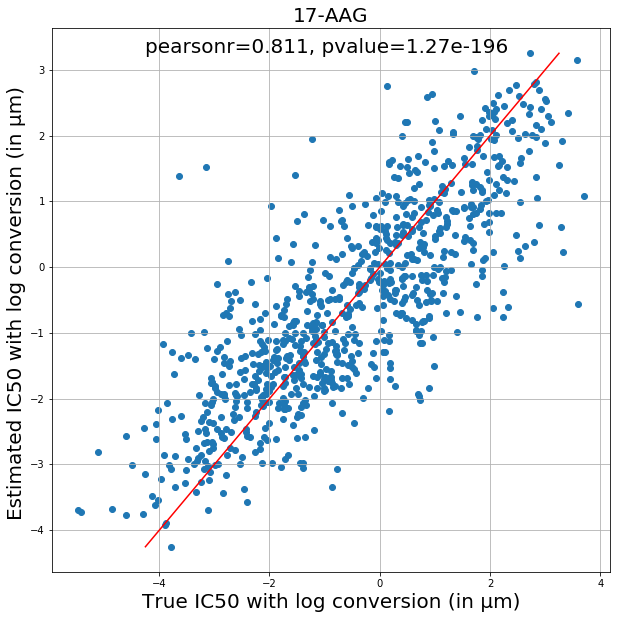

Pearson Correlation Coefficient of testset:  0.8315688238087161 pvalue :  3.0031917016706634e-44

------------------------------------------

this is prediction for  AZD-0530

------------------------------------------

 nan sample num is :  622

 sample of dataset :  396 , num of genes  :  17737

------------------------------------------

 gene num after PCC (per-selection):  3379

This is 2nd selection using EN....alpha= 0.03

ElasticNet picked 262 variables and eliminated the other 3117 variables

Find best parma for prediction by Grid search

Best Scroe(Normalized.MSE): -0.2576 with parameters {'alpha': 0.9, 'l1_ratio': 0}
Normalized.MSE (CV) = -0.2576

Pearson Correlation Coefficient :  0.6121408612938638 pvalue :  4.389606476809714e-42


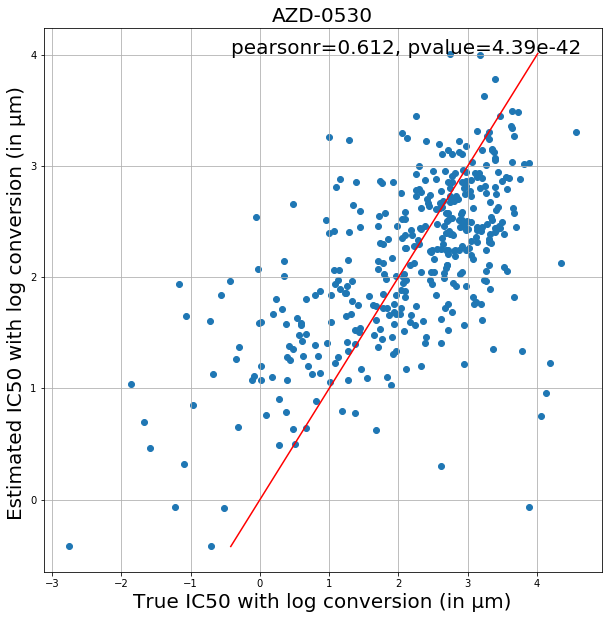

Pearson Correlation Coefficient of testset:  0.6985419915380258 pvalue :  5.856043293477215e-13

------------------------------------------

this is prediction for  AZD6244

------------------------------------------

 nan sample num is :  111

 sample of dataset :  907 , num of genes  :  17737

------------------------------------------

 gene num after PCC (per-selection):  9312

This is 2nd selection using EN....alpha= 0.03

ElasticNet picked 570 variables and eliminated the other 8742 variables

Find best parma for prediction by Grid search

Best Scroe(Normalized.MSE): -0.2207 with parameters {'alpha': 0.3, 'l1_ratio': 0}
Normalized.MSE (CV) = -0.2207

Pearson Correlation Coefficient :  0.8228129577064638 pvalue :  2.565850553480195e-224


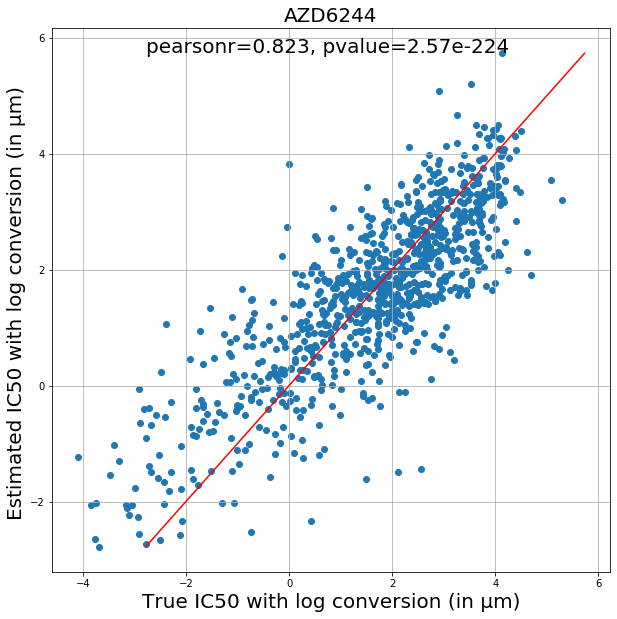

Pearson Correlation Coefficient of testset:  0.809232899597845 pvalue :  1.9239520980947117e-43

------------------------------------------

this is prediction for  Erlotinib

------------------------------------------

 nan sample num is :  656

 sample of dataset :  362 , num of genes  :  17737

------------------------------------------

 gene num after PCC (per-selection):  2774

This is 2nd selection using EN....alpha= 0.03

ElasticNet picked 253 variables and eliminated the other 2521 variables

Find best parma for prediction by Grid search

Best Scroe(Normalized.MSE): -0.2478 with parameters {'alpha': 0.8, 'l1_ratio': 0}
Normalized.MSE (CV) = -0.2478

Pearson Correlation Coefficient :  0.6025877702186921 pvalue :  3.738838839870459e-37


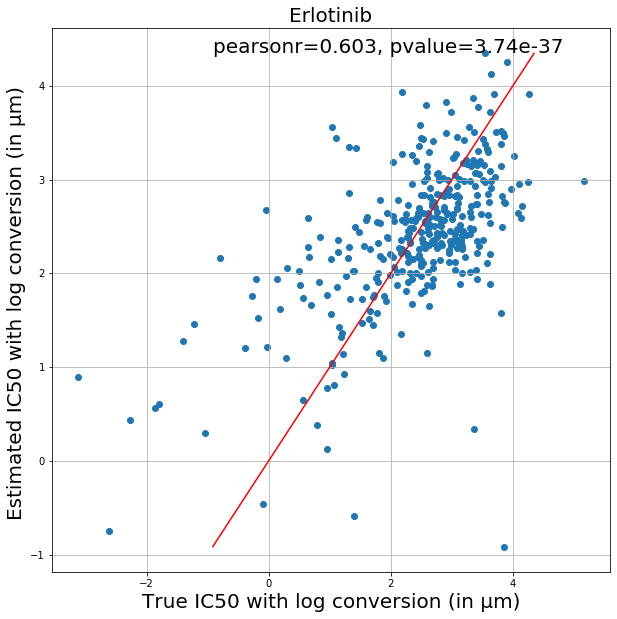

Pearson Correlation Coefficient of testset:  0.6607406620388195 pvalue :  2.0043382885742573e-10

------------------------------------------

this is prediction for  Lapatinib

------------------------------------------

 nan sample num is :  631

 sample of dataset :  387 , num of genes  :  17737

------------------------------------------

 gene num after PCC (per-selection):  4893

This is 2nd selection using EN....alpha= 0.03

ElasticNet picked 261 variables and eliminated the other 4632 variables

Find best parma for prediction by Grid search

Best Scroe(Normalized.MSE): -0.363 with parameters {'alpha': 0.7, 'l1_ratio': 0}
Normalized.MSE (CV) = -0.363

Pearson Correlation Coefficient :  0.6982927078710511 pvalue :  7.267776052663874e-58


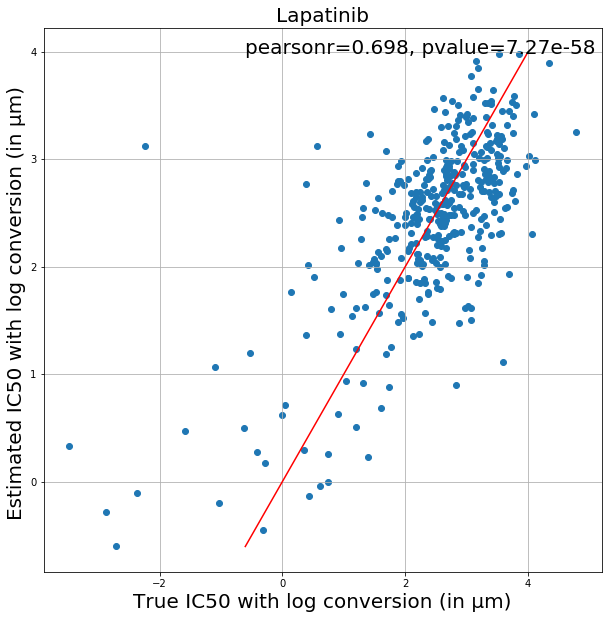

Pearson Correlation Coefficient of testset:  0.8115691796119583 pvalue :  2.0407949994639663e-19

------------------------------------------

this is prediction for  Nilotinib

------------------------------------------

 nan sample num is :  229

 sample of dataset :  789 , num of genes  :  17737

------------------------------------------

 gene num after PCC (per-selection):  9489

This is 2nd selection using EN....alpha= 0.03

ElasticNet picked 475 variables and eliminated the other 9014 variables

Find best parma for prediction by Grid search



In [ ]:
for drug_name in lst_drug:
    
    print('this is prediction for ',drug_name)
    print()
    print('------------------------------------------')
    print()
    cor_list=[]
    #predict nan data
    
    one_drug=pd.DataFrame([str(x) for x in list(df_dr['Cell line cosmic identifiers'])])
    one_drug['ic50']=list(df_dr[drug_name])
    one_drug.columns=['id','ic50']
    drug_data=one_drug.dropna(axis=0)['ic50']
    drug_data.index=one_drug.dropna(axis=0)['id']
    common_id=list(set(drug_data.index)&set(df_exp.columns))
    common_id.sort(reverse=False,key=int)

    nan_id=[i for i in df_exp.columns if i not in common_id]

    print(' nan sample num is : ',len(nan_id))
    nan_data=df_exp[nan_id]
    nan_data.index=genename
    #

    exp=df_exp[common_id]
    exp.index=genename
    drug=drug_data[common_id]
    full_df=(exp.append(drug)).T
    X=full_df.iloc[:,0:17737]
    y=full_df['ic50']
    
    #print(X)
    print()
    #print(y)
    
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
    print( ' sample of dataset : ', X.shape[0], ', num of genes  : ', X.shape[1] )
    print()
    print('------------------------------------------')
    print()



    from scipy.stats import pearsonr
    pval=[]

    for n in X_train.columns:
        cor=pearsonr(X_train[n],y_train)[1]
        pval.append(cor)

    #print(len(pval))

    per_ind=[]   
    for j in range(X_train.shape[1]):        
        if pval[j] < 0.05 :            
            per_ind.append(j)        
        else:
            pass


    ind=X.columns[per_ind]
    X_train_1=X_train[ind]
    #print(len(ind))
    print( ' gene num after PCC (per-selection): ', len(ind) )
    print()
    #     print(X_train_1)

    
    print('This is 2nd selection using EN....alpha=',lst_alpha[0])
    print()
        
    sel=ElasticNet(alpha=lst_alpha[0],l1_ratio=0.5)
    sel.fit(X_train_1,y_train)
    coef = pd.Series(sel.coef_, index = X_train_1.columns) 
    print("ElasticNet picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  
              str(sum(coef == 0)) + " variables")

#     imp_coef = pd.concat([coef.sort_values().head(10),coef.sort_values().tail(10)])
#     matplotlib.rcParams['figure.figsize'] = (8, 10)
#     imp_coef.plot(kind = "barh")
#     plt.title("Coefficients in the ElasticNet Model"+' ('+drug_name+')')
#     plt.savefig(drug_name+".featurecoff.jpg",dpi=500,bbox_inches = 'tight')
#     plt.show()
    
    
    
    
    EN_features=(coef[coef != 0]).index
    X_train_2=X_train_1[EN_features]
    #print(EN_features)
    df=pd.DataFrame(EN_features)
    #df.to_csv(drug_name+'_'+str(len(EN_features))+'_'+str(i)+'_'+'_feature_ccle.csv',sep=',')
    print()
    print('Find best parma for prediction by Grid search')
    print()
    
        ##REGRESSION
    NCV=5

    param_grid={'alpha':[0.00001,0.0001,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.5,2,3,4,5,10],'l1_ratio':[0,0.1,0.3,0.5,0.7,0.9,1]}
        #param_grid={'alpha':[0.00001,0.0001,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
        #param_grid={'alpha':lst_alpha}

    regressor=ElasticNet()
    reg = GridSearchCV(regressor, param_grid, cv=NCV, scoring='r2', iid=False)
    reg.fit(X[EN_features],y)

       ## (6) Get best paramter
    best_param = reg.best_params_
    print("Best Scroe(Normalized.MSE): " + str(round(-reg.best_score_/y.var(),4)) + " with parameters ", end='' )
    print(reg.best_params_)

       ## (7) Performance test using the best parameters
    regressor.set_params( **best_param )
    cv_scores = cross_val_score(regressor, X[EN_features], y, scoring='r2', cv=NCV)
    score = -cv_scores.mean()/y.var()
    print( "Normalized.MSE (CV) = " + str(round(score,4)) + "\n" )

    y_pred = cross_val_predict(regressor, X[EN_features], y, cv=NCV)
    print('Pearson Correlation Coefficient : ', pearsonr(y_pred,y)[0],
                      'pvalue : ',pearsonr(y_pred,y)[1])

    
    response_df1=pd.DataFrame({'y':list(y), 'y_pred':list(y_pred)})
    response_df1['drug']= drug_name
    
    response_df=response_df.append(response_df1)
    plt.figure(figsize=(10, 10))

    plt.scatter(y,y_pred)

        #xp = [min(y), max(y)]
    xp = [min(y_pred), max(y_pred)]
    yp = xp
    plt.plot(xp,yp,'r-')
    plt.xlabel('True IC50 with log conversion (in µm)',fontsize=20)
    plt.ylabel('Estimated IC50 with log conversion (in µm) ',fontsize=20)
#     plt.xlabel('True AUC with log conversion ',fontsize=20)
#     plt.ylabel('Estimated AUC with log conversion ',fontsize=20)
    plt.title(drug_name,fontsize=20)
    plt.text(min(y_pred),max(y_pred), 'pearsonr={:.3f}, pvalue={:.2e}'.format(pearsonr(y_pred,y)[0], pearsonr(y_pred,y)[1]),fontsize=20)
    plt.grid()
    #plt.savefig(drug_name+".2020_ic50.jpg",dpi=300)
    plt.show()
    cor_list.append(pearsonr(y_pred,y)[0])

       ## running regressor using the best parameters
    X_train, X_test, y_train, y_test = train_test_split(X[EN_features], y, test_size=0.2, random_state=5)
    regressor.set_params(**best_param)
    regressor.fit(X_train,y_train)

    coef1 = pd.Series(regressor.coef_, index = X_train.columns) 
#     print("ElasticNet picked " + str(sum(coef1 != 0)) + " variables and eliminated the other " +  
#               str(sum(coef1 == 0)) + " variables")
    y_pred = regressor.predict(X_test)
    mse = ((y_test - y_pred)**2).mean()
    mse_norm = mse/y_test.var()

    #     plt.figure(figsize=(10, 10))
    #     plt.scatter(y_test,y_pred)
    #     #xp = [min(y_test), max(y_test)#
    #     xp = [min(y_pred), max(y_pred)]
    #     yp = xp
    #     plt.plot(xp,yp,'r-')
    #     plt.title(drug_name)
    #     plt.xlabel('True IC50')
    #     plt.ylabel('Estimated IC50')
    #     plt.text(min(y_pred),max(y_pred), 'pearsonr={:.3f}, pvalue={:.2e}'.format(pearsonr(y_pred,y_test)[0], pearsonr(y_pred,y_test)[1]))
    #     plt.grid()
    #     #plt.savefig(drug_name+".png")
    #     plt.show()
    print('Pearson Correlation Coefficient of testset: ', pearsonr(y_pred,y_test)[0],
                      'pvalue : ',pearsonr(y_pred,y_test)[1])
    print()
    print('------------------------------------------')
    print()

    
response_data=response_data.append(response_df)
# #pred nan data
#     pred_nan=pd.DataFrame(regressor.predict(nan_data.T[EN_features]))
#     df1=pd.DataFrame(pred_nan)
#     df1['label'] = 'nan_predict'
#     df1['drug'] = drug_name
#     df2=pd.DataFrame(list(y))
#     df2['label'] = 'true_value'
#     df2['drug'] = drug_name
#     df=df1.append(df2)
#     df_final=df_final.append(df)